In [1]:
import pandas as pd
import numpy as np
import json

from app_store_scraper import AppStore
getgo = AppStore(country='sg', app_name='getgo', app_id = '1545316216')

getgo.review(how_many=2000)

2023-02-23 22:31:44,730 [INFO] Base - Initialised: AppStore('sg', 'getgo', 1545316216)
2023-02-23 22:31:44,731 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/sg/app/getgo/id1545316216
2023-02-23 22:31:49,759 [INFO] Base - [id:1545316216] Fetched 440 reviews (440 fetched in total)
2023-02-23 22:31:51,727 [INFO] Base - [id:1545316216] Fetched 616 reviews (616 fetched in total)


In [2]:
getgo.reviews[:10]

[{'date': datetime.datetime(2021, 10, 29, 2, 42, 14),
  'developerResponse': {'id': 26048957,
   'body': "Hey Gracias, thank you for your review! We really appreciate your support and we are so glad you are enjoying our service. 😊 We will definitely take note of your feedback and take it into consideration as we continue to improve on our service! We can't wait to see you continue to enjoy the #FreedomToDrive with us. 🥰\n\nCheers, Natalie",
   'modified': '2021-11-03T06:03:49Z'},
  'review': 'Good point A to point A rental service with no membership fees! The app interface is very intuitive and easy to use although there are some issues connecting to the car to unlock them at times depending on the connection. \n\nAlso, because the rental return is based on the app, essential to make sure your phone as enough battery. The fleets are well maintained, clean and available at many convenient locations. Save $, Don’t need to buy car. :)\n\nSome areas to improve on will be the chat function 

In [3]:
getgodf = pd.DataFrame(np.array(getgo.reviews),columns=['review'])
getgodf2 = getgodf.join(pd.DataFrame(getgodf.pop('review').tolist()))
getgodf2.head()

,date,developerResponse,review,rating,isEdited,userName,title
0,2021-10-29 02:42:14,"{'id': 26048957, 'body': 'Hey Gracias, thank y...",Good point A to point A rental service with no...,4,False,Gracias.i.m,"Convenient rental service, Easy to use app int..."
1,2022-01-28 07:52:22,"{'id': 27222908, 'body': 'Hey Vishal, thanks f...",Today booked Ssangyong XLV with GetGo Carshari...,5,True,Vishal C B,Need to Access current Booking via Offline (To...
2,2021-12-04 02:47:08,"{'id': 26796019, 'body': 'Hey Lexus, thank you...",GetGO had a strong community at a certain plat...,5,False,Lexus Guo,it’s nothing but a PERFECT APP
3,2021-12-08 02:23:32,"{'id': 26796398, 'body': 'Hey gogetclean, than...",Hi i would like to reflect on the cleanliness ...,5,False,gogetclean,Responsibility of hirer.
4,2022-03-10 10:30:15,NaN,"I joined GetGo in February 2021, when they fir...",5,False,kelv99,"Easy to use app, fantastic customer service te..."


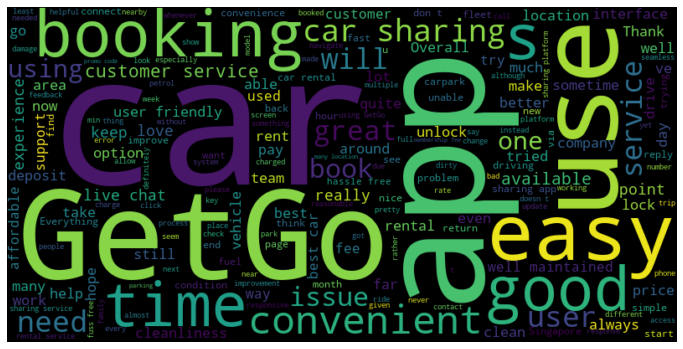

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# create a word cloud from the review column
text = ' '.join(getgodf2['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [5]:
wordcloud.to_file('wordcloudreview.png')

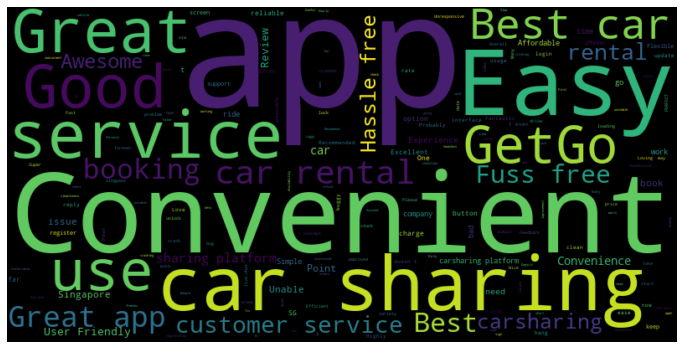

In [6]:
# create a word cloud from the review column
text = ' '.join(getgodf2['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
wordcloud.to_file('wordcloudtitle.png')

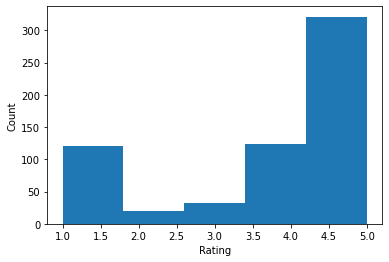

In [8]:

# create a histogram of the rating column
plt.hist(getgodf2['rating'], bins=5)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


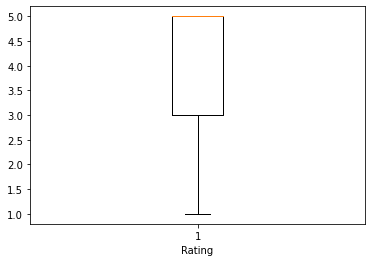

In [9]:


# create a box plot of the rating column
plt.boxplot(getgodf2['rating'])
plt.xlabel('Rating')
plt.show()

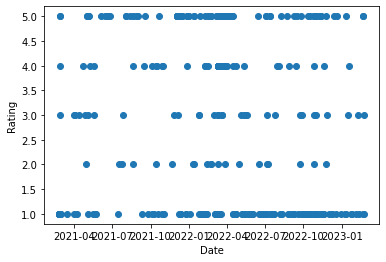

In [10]:


# convert the date column to a datetime format
getgodf2['date'] = pd.to_datetime(getgodf2['date'], format='%Y-%m-%d %H:%M:%S')

# create a scatter plot of rating vs date
plt.scatter(getgodf2['date'], getgodf2['rating'])
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()


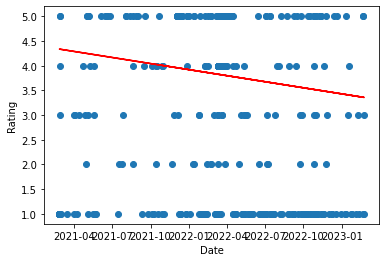

In [11]:
from scipy import stats

# create a scatter plot of rating vs date
plt.scatter(getgodf2['date'], getgodf2['rating'])

# add a linear trendline to the scatter plot
slope, intercept, r_value, p_value, std_err = stats.linregress(getgodf2['date'].astype(int), getgodf2['rating'])
line = slope*getgodf2['date'].astype(int) + intercept
plt.plot(getgodf2['date'], line, color='red')

plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

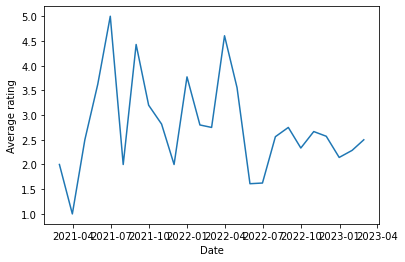

In [12]:

# group the data by month and calculate the mean rating
df_monthly = getgodf2.groupby(pd.Grouper(key='date', freq='M'))['rating'].mean().reset_index()

# create a line chart of the monthly average rating
plt.plot(df_monthly['date'], df_monthly['rating'])
plt.xlabel('Date')
plt.ylabel('Average rating')
plt.show()


In [13]:
# select the rows where the rating is 1
df_rating_1 = getgodf2[getgodf2['rating'] == 1]

df_rating_1['review'].head(10)

8      I faced the exact same issue as a previous rev...
17     If you are a thrill seeker and like surprises,...
35     App crashes with errors, no way around but rei...
38     I booked for an hour but I didn’t turn up to u...
39     Very poor and disappointing customer service o...
57     Great idea - fantastic for the sharing economy...
61     Having a car booked, system or admin doesn’t i...
82     Don't forgo your car for community ones just y...
86     This is my first time using this service and i...
111    Whenever I launched the app or tap anywhere it...
Name: review, dtype: object

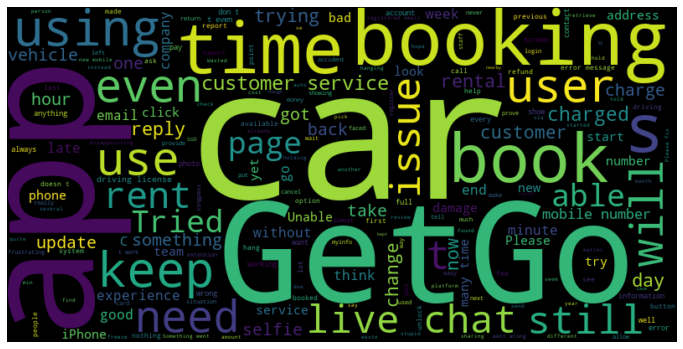

In [14]:
# create a word cloud from the review column
text = ' '.join(df_rating_1['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
wordcloud.to_file('wordcloudrating1.png')

In [17]:
df_monthly

,date,rating
0,2021-02-28,2.000000
1,2021-03-31,1.000000
2,2021-04-30,2.500000
3,2021-05-31,3.625000
4,2021-06-30,5.000000
5,2021-07-31,2.000000
6,2021-08-31,4.428571
7,2021-09-30,3.200000
8,2021-10-31,2.818182
9,2021-11-30,2.000000


In [18]:
from statsmodels.tsa.arima.model import ARIMA

# fit an ARIMA model to the number of reviews per month
model = ARIMA(df_monthly['rating'], order=(1,1,1))
model_fit = model.fit()

# use the model to make a one-step forecast for the next month
forecast = model_fit.forecast()

# print the forecasted number of reviews for the next month
print(forecast)


25    2.706629
dtype: float64
